# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


**Deskripsi Dataset**

Dataset ini digunakan untuk menganalisis efektivitas kampanye pemasaran yang dilakukan oleh sebuah institusi keuangan. Tujuan utama analisis adalah untuk menentukan strategi terbaik yang dapat meningkatkan keberhasilan kampanye pemasaran pada periode selanjutnya.

Untuk mencapai tujuan tersebut, dilakukan analisis terhadap kampanye pemasaran sebelumnya guna mengidentifikasi pola, karakteristik nasabah, serta faktor-faktor yang berpengaruh terhadap keberhasilan pemasaran. Hasil analisis ini diharapkan dapat menjadi dasar dalam penyusunan strategi pemasaran yang lebih efektif dan tepat sasaran di masa depan.

Dataset yang digunakan merupakan Bank Marketing Dataset, sebuah dataset klasik yang awalnya dipublikasikan oleh UCI Machine Learning Repository dan juga tersedia di platform Kaggle. Dataset ini berisi informasi mengenai kampanye pemasaran langsung (direct marketing) sebuah bank, yang dilakukan melalui panggilan telepon kepada nasabah.

Dataset mencakup berbagai atribut yang menggambarkan:
*   Karakteristik demografis nasabah
*   Informasi ekonomi dan finansial
*   Detail interaksi selama kampanye pemasaran
*   Respons nasabah terhadap penawaran produk perbankan

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
url='https://drive.google.com/uc?id=1uhfTTaBdGDHhTTx8tVoO0ne28I_Sv2dc'
df = pd.read_csv(url, sep=',')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.shape

(11162, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

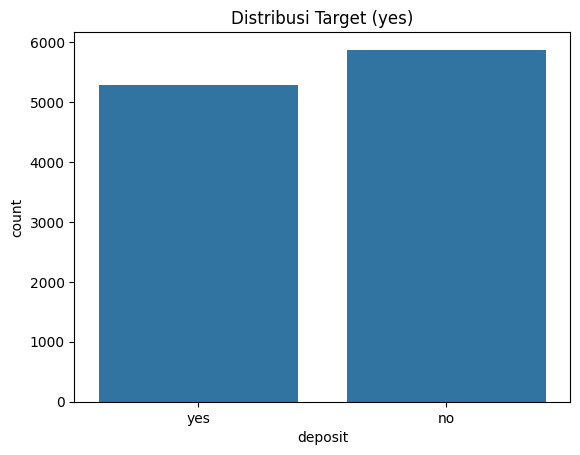

In [7]:
df['deposit'].value_counts()

sns.countplot(x='deposit', data=df)
plt.title("Distribusi Target (yes)")
plt.show()

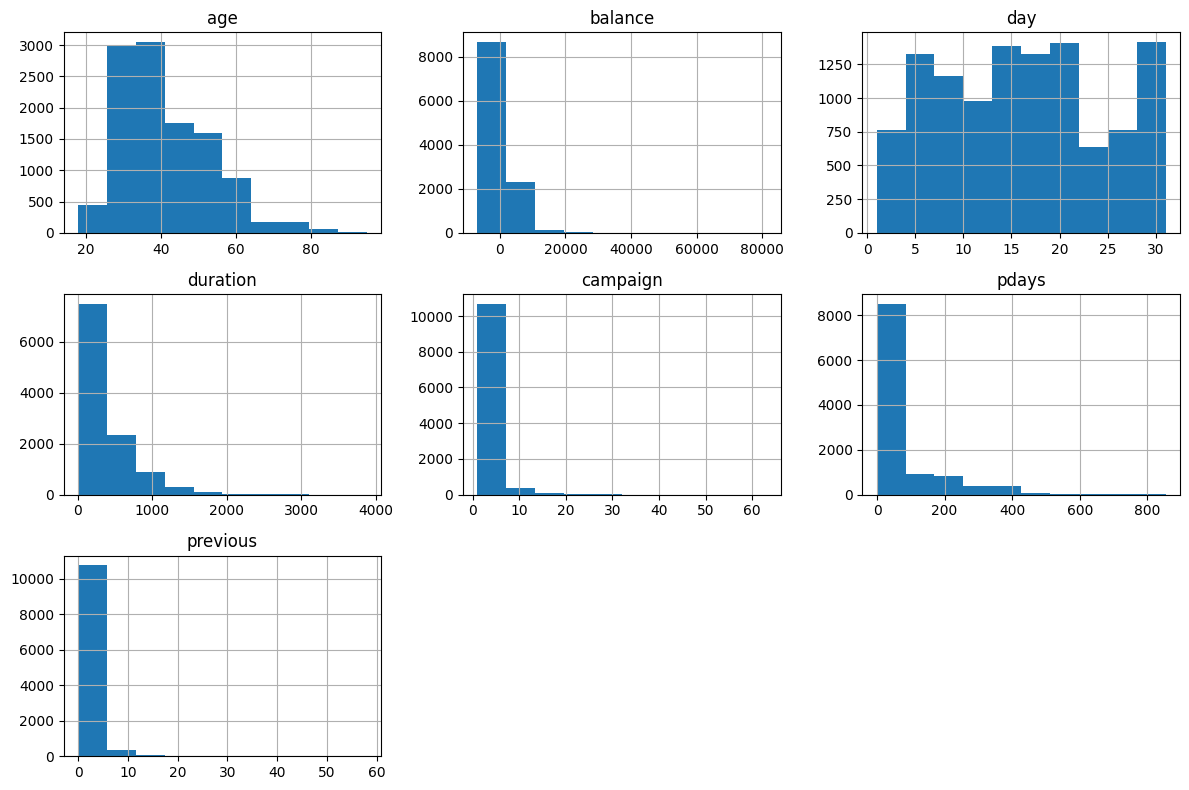

In [8]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].describe()

df[numerical_cols].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


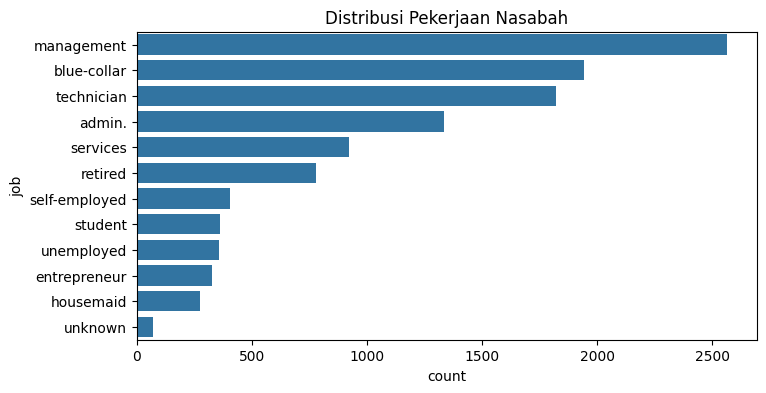

In [9]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols].nunique()

plt.figure(figsize=(8,4))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index)
plt.title("Distribusi Pekerjaan Nasabah")
plt.show()


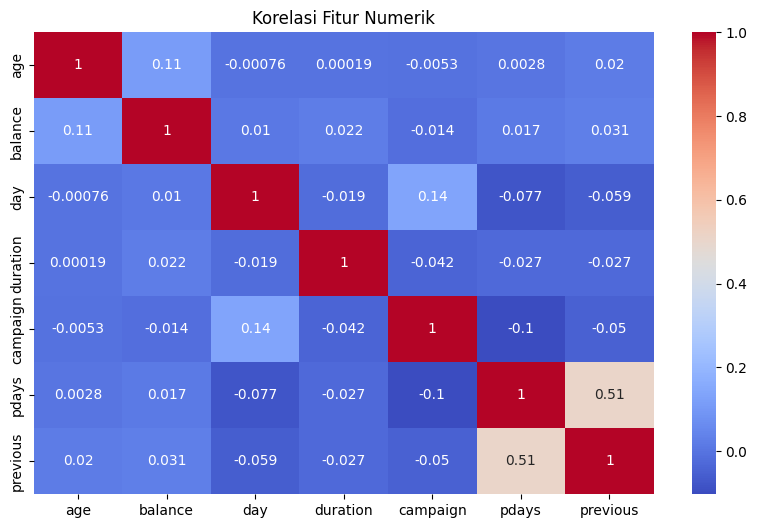

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerik")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
X = df.drop("deposit", axis=1)
y = df["deposit"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [12]:
numerical_cols = [
    'age', 'balance', 'day', 'duration',
    'campaign', 'pdays', 'previous'
]

categorical_cols = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month', 'poutcome'
]


In [13]:
num_features = [
    "age", "balance", "day", "duration",
    "campaign", "pdays", "previous"
]

cat_features = [
    "job", "marital", "education", "default",
    "housing", "loan", "contact", "month", "poutcome"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)


In [14]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [15]:
os.makedirs("bankdataset_preprocessing", exist_ok=True)

feature_names = (
    preprocessor.named_transformers_["num"].get_feature_names_out(num_features).tolist()
    + preprocessor.named_transformers_["cat"].get_feature_names_out(cat_features).tolist()
)

def to_dense(x):
    return x.toarray() if hasattr(x, "toarray") else x

X_train_df = pd.DataFrame(to_dense(X_train_processed), columns=feature_names)
X_test_df = pd.DataFrame(to_dense(X_test_processed), columns=feature_names)

X_train_df.to_csv("bankdataset_preprocessing/X_train.csv", index=False)
X_test_df.to_csv("bankdataset_preprocessing/X_test.csv", index=False)
y_train.to_csv("bankdataset_preprocessing/y_train.csv", index=False)
y_test.to_csv("bankdataset_preprocessing/y_test.csv", index=False)

In [16]:
X_train = pd.read_csv("bankdataset_preprocessing/X_train.csv")
X_test  = pd.read_csv("bankdataset_preprocessing/X_test.csv")
y_train = pd.read_csv("bankdataset_preprocessing/y_train.csv")
y_test  = pd.read_csv("bankdataset_preprocessing/y_test.csv")

print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(8929, 51) (2233, 51)
deposit
no         0.526151
yes        0.473849
Name: proportion, dtype: float64
deposit
no         0.526198
yes        0.473802
Name: proportion, dtype: float64


In [19]:
import shutil

shutil.make_archive(
    "bankdataset_preprocessing",
    'zip',
    "bankdataset_preprocessing"
)


'/content/bankdataset_preprocessing.zip'